In [ ]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [ ]:
string = tf.Variable("this is a string",tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567,tf.float64)

In [ ]:
rank1_tensor = tf.Variable(["Test"],tf.string)
rank2_tensor = tf.Variable([["test","ok","yes"],["test","yes","ok"],["ok","ok","ok"]], tf.string)

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
rank2_tensor.shape

TensorShape([3, 3])

In [ ]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
tensor2 = tf.reshape(tensor1,[2,3,1])
tensor3 = tf.reshape(tensor2,[3, -1])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [ ]:
import tensorflow as tf
print(tf.version)

t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t,[625])
print(t)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>
tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 

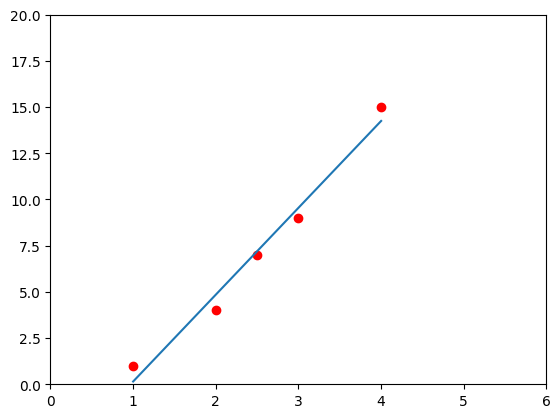

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(np.unique(x), polynomial(np.unique(x)))

plt.show()


In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain["age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


In [ ]:
dftrain.head()

sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y

In [ ]:
dftrain.describe()

age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

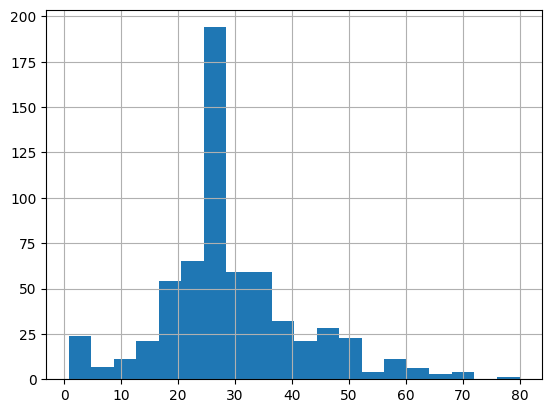

In [ ]:
dftrain.age.hist(bins=20)

<Axes: >

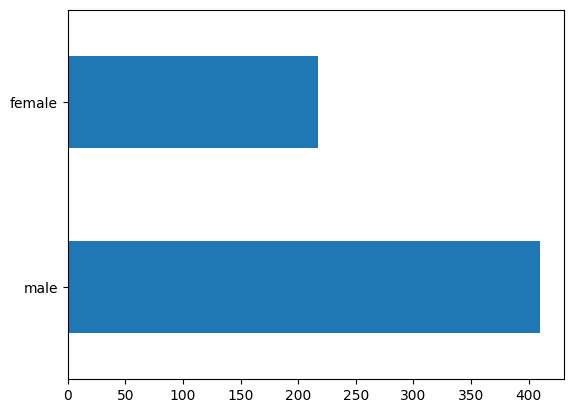

In [ ]:
dftrain.sex.value_counts().plot(kind="barh")

<Axes: >

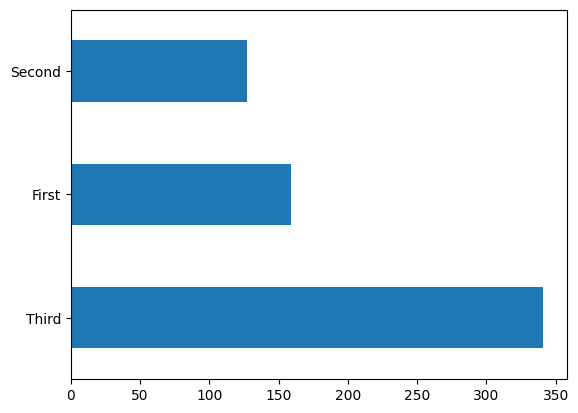

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

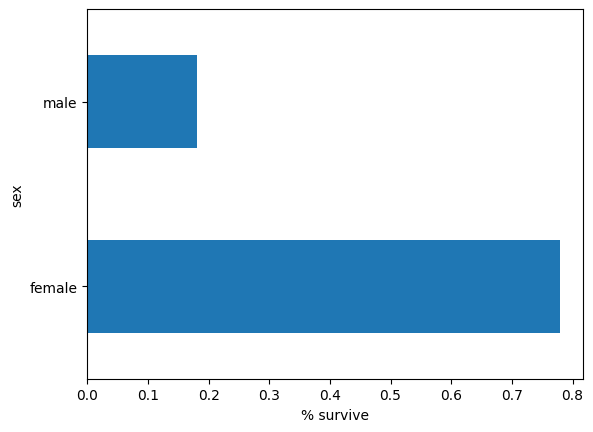

In [ ]:
pd.concat([dftrain, y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class','deck','embark_town','alone']
number = ['age','fare']

feature_ = []

for name in categorical_columns:
  vocab = dftrain[name].unique()
  feature_.append(tf.feature_column.categorical_column_with_vocabulary_list(name, vocab))

for name in number:
  feature_.append(tf.feature_column.numeric_column(name,dtype=tf.float32))

print(feature_)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
dftrain["age"].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  ,  2.  , 27.  , 14.  ,  4.  ,
       20.  , 39.  , 31.  , 19.  , 40.  , 66.  , 42.  ,  3.  , 18.  ,
        7.  , 49.  , 29.  , 65.  , 21.  , 28.5 , 11.  , 45.  , 17.  ,
       32.  , 25.  ,  0.83, 30.  , 16.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 34.  , 33.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 ,  9.  ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 50.  , 36.  , 58.  , 20.5 ,
       41.  , 63.  , 43.  , 61.  , 15.  , 60.  , 64.  ,  5.  , 52.  ,
       48.  , 56.  ,  0.75, 54.  , 62.  , 53.  , 57.  , 80.  ,  6.  ,
       70.  , 30.5 , 10.  , 34.5 ])

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])
print(result)


0.7765151
{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.83786345, 'auc_precision_recall': 0.78279245, 'average_loss': 0.47906256, 'label/mean': 0.375, 'loss': 0.4623721, 'precision': 0.6818182, 'prediction/mean': 0.42137673, 'recall': 0.75757575, 'global_step': 2000}


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.26349598


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file( "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

train.head()

573/573 [==============================] - 0s 0us/step


SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          6.4         2.8          5.6         2.2
1          5.0         2.3          3.3         1.0
2          4.9         2.5          4.5         1.7
3          4.9         3.1          1.5         0.1
4          5.7         3.8          1.7         0.3

In [ ]:
print(train.shape)

(120, 4)


In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

def input_fn(features, labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3
)

classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=15000
)




Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv2hlq9ys', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_

In [ ]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-07-01T16:23:31
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv2hlq9ys/model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87170s
INFO:tensorflow:Finished evaluation at 2023-07-01-16:23:32
INFO:tensorflow:Saving dict for global step 15000: accuracy = 0.93333334, average_loss = 0.35404605, global_step = 15000, loss = 0.35404605
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15000: /tmp/tmpv2hlq9ys/model.ckpt-15000



Test set accuracy: 0.933



In [ ]:
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ":")
    if not val.isdigit(): valid = False
  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda:input_fn(predict))

for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]

  print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength:5.5
SepalWidth:6.7
PetalLength:8.9
PetalWidth:10.2


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv2hlq9ys/model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Prediction is "Virginica" (98.5%)


In [ ]:
#hidden markov model
import tensorflow_probability as tfp
import tensorflow as tf

tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs=[0.8,0.2])
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],[0.2, 0.8]])

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5.,10.])

model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps=7
)

mean = model.mean()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[ 3.        8.4      10.02     10.506    10.651799 10.69554  10.708661]


4422102/4422102 [==============================] - 0s 0us/step


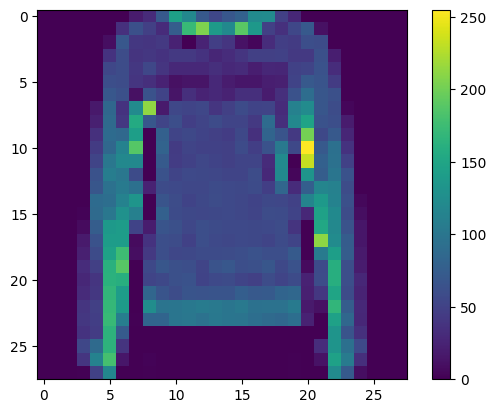

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape


train_images[0,23,23]

train_labels[::10]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']

plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0

test_image = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4944 - accuracy: 0.8262


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Accuracy : ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 68.0649 - accuracy: 0.8249
Accuracy :  0.8248999714851379


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


T-shirt/top


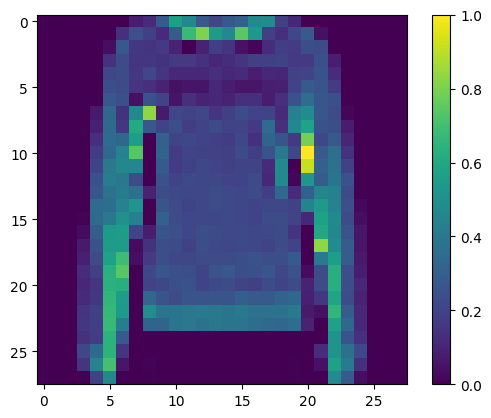

In [ ]:
print(class_names[np.argmax(predictions[400])])
plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 50
1/1 [==============================] - 0s 22ms/step
Coat


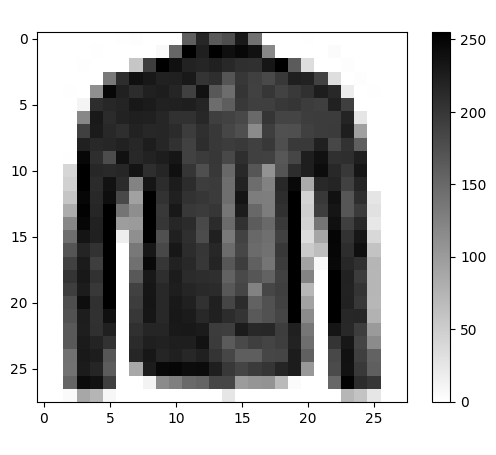

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print(predicted_class)
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):

  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels) , (test_images, test_labels) = datasets.cifar10.load_data()

class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 2s 0us/step


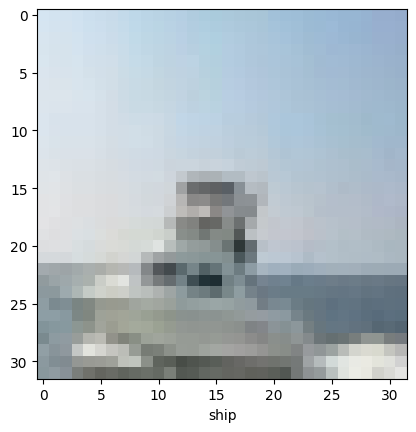

In [4]:
imgindex = 100

plt.imshow(train_images[imgindex] , cmap=plt.cm.binary)
plt.xlabel(class_name[train_labels[imgindex][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) , activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.8045 - accuracy: 0.3850 - val_loss: 1.4939 - val_accuracy: 0.4556
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3560 - accuracy: 0.5135 - val_loss: 1.2477 - val_accuracy: 0.5538
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2162 - accuracy: 0.5675 - val_loss: 1.1948 - val_accuracy: 0.5847
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1097 - accuracy: 0.6066 - val_loss: 1.1310 - val_accuracy: 0.6032
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0270 - accuracy: 0.6399 - val_loss: 1.0846 - val_accuracy: 0.6243
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9523 - accuracy: 0.6663 - val_loss: 1.0722 - val_accuracy: 0.6413
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8950 - accuracy: 0.6860 - val_loss: 1.1206 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 1.0687 - accuracy: 0.6578 - 4s/epoch - 12ms/step
0.657800018787384


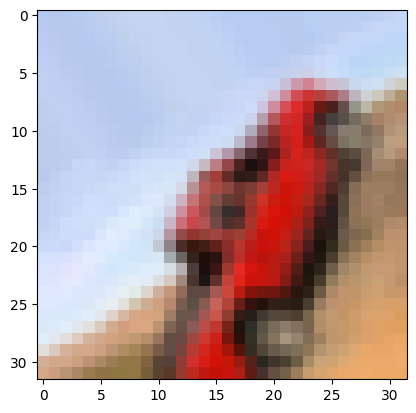

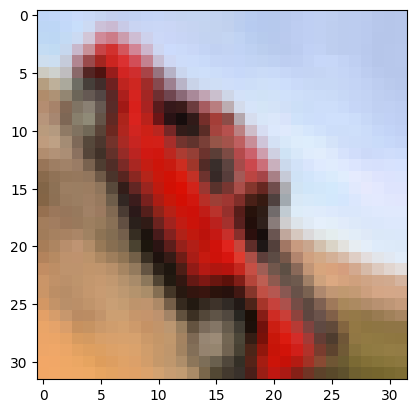

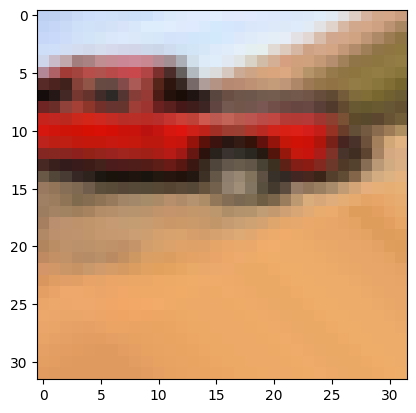

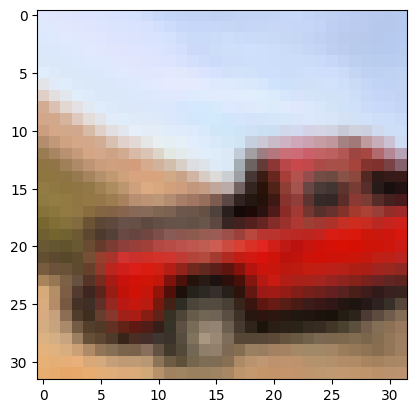

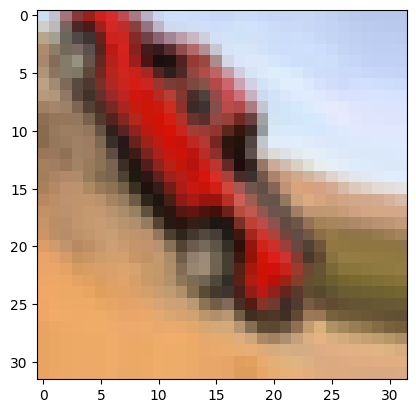

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_img = train_images[140]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    img_batch = np.clip(image.img_to_array(batch[0]) / 255.0, 0, 1)
    plot = plt.imshow(img_batch)
    i += 1
    if i > 4:
        break

plt.show()


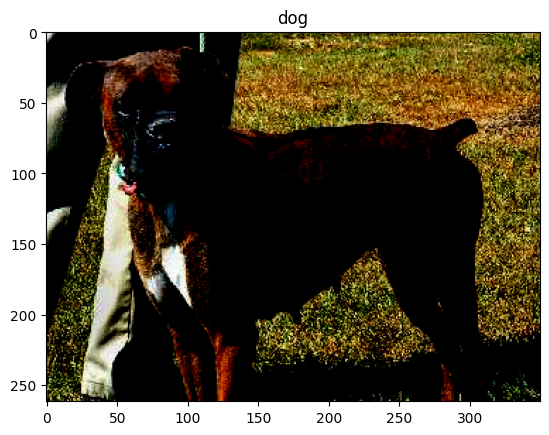

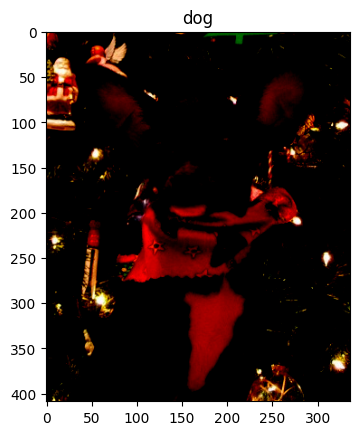

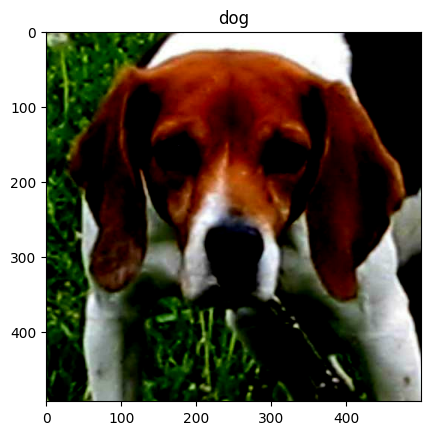

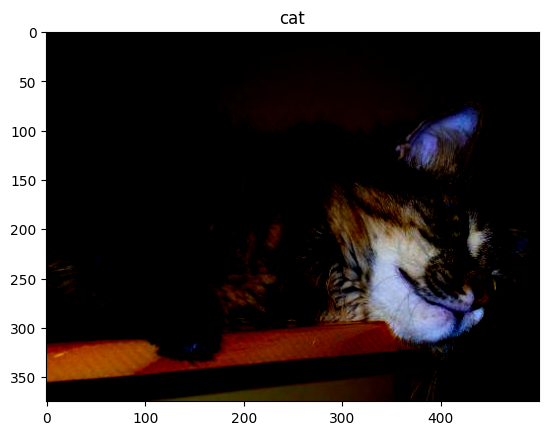

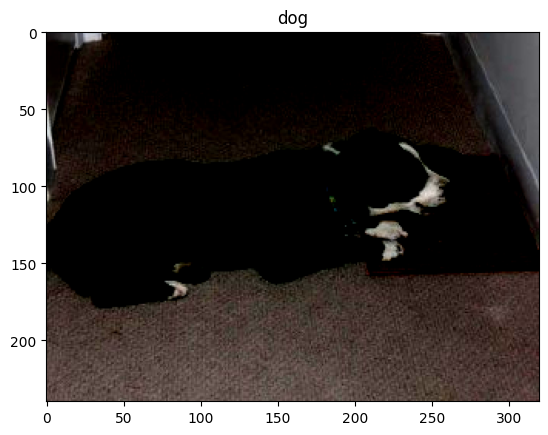

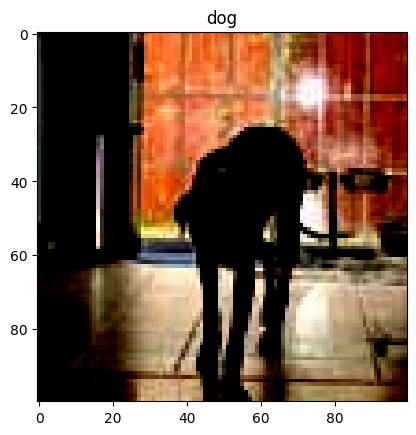

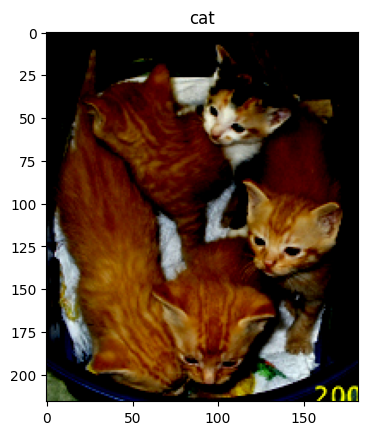

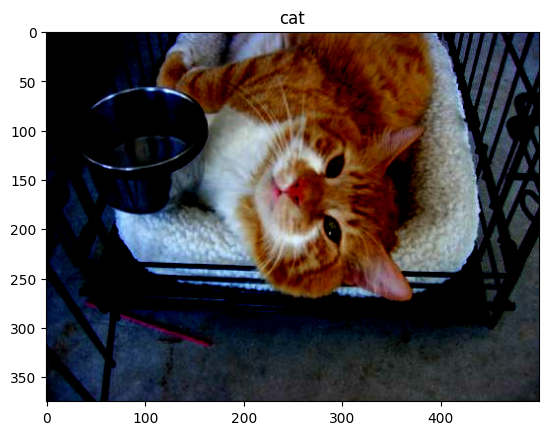

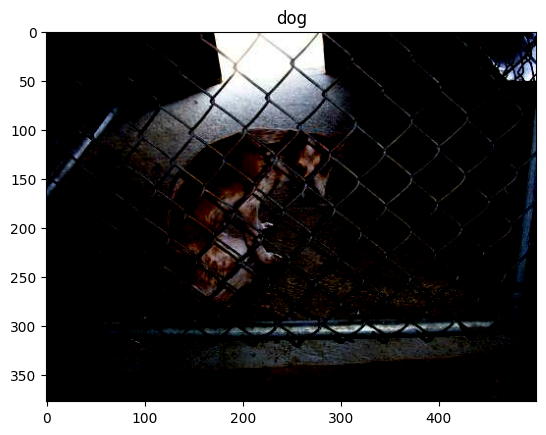

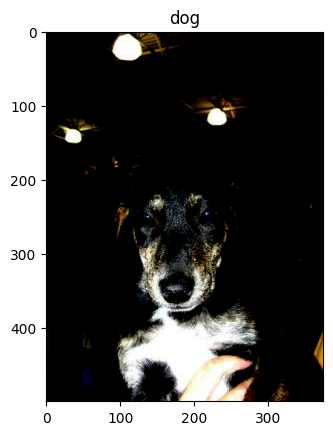

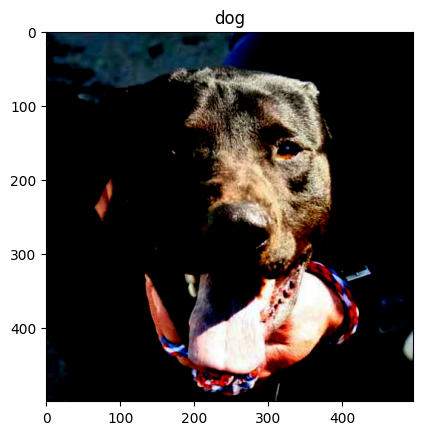

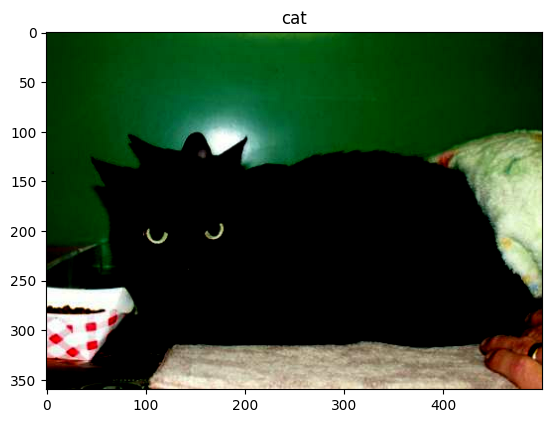

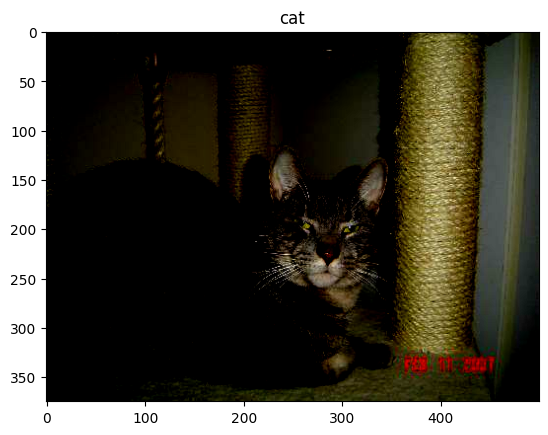

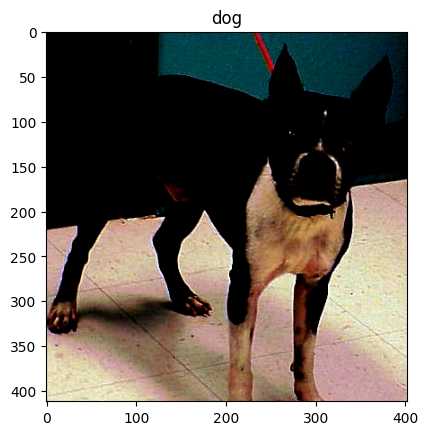

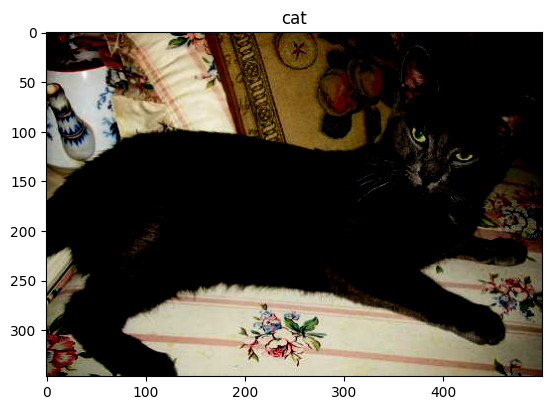

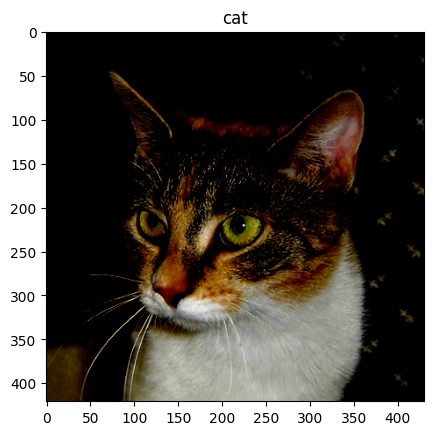

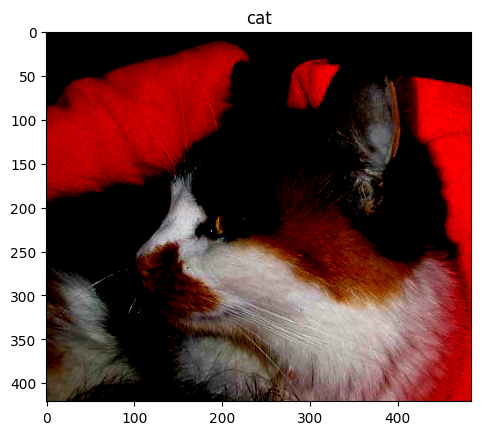

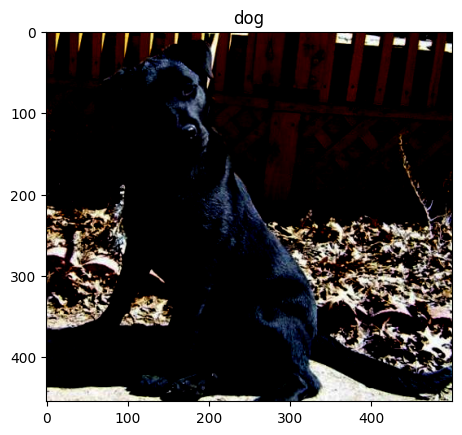

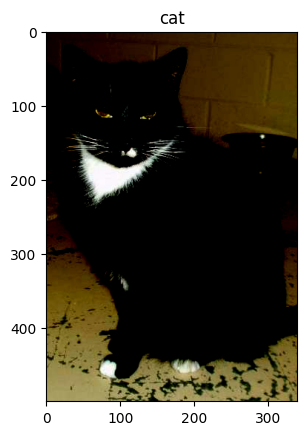

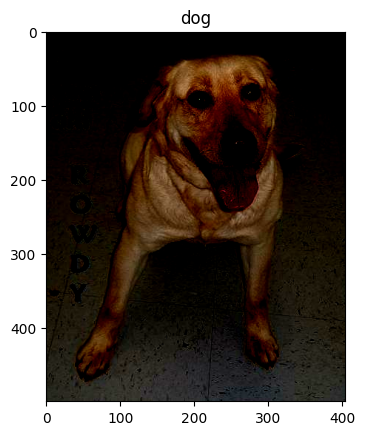

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
keras = tf.keras

tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

get_label_name = metadata.features['label'].int2str
imge_size = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  imge = tf.image.resize(image, (imge_size, imge_size))
  return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

for image, label in train.take(20):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))
